 Firstly, we will import required modules .

In [38]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [39]:
#suppress warnong for cleaning notebook
import warnings
warnings.filterwarnings('ignore')

## Read the dataset first

In [40]:
file=r"C:\Users\sg001\Desktop\KU_Data_Analytics\insurance_data.csv"
df = pd.read_csv(file)
df.head(5)


age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520

In [41]:
df.tail()

age     sex    bmi  children smoker     region     charges
1333   50    male  30.97         3     no  northwest  10600.5483
1334   18  female  31.92         0     no  northeast   2205.9808
1335   18  female  36.85         0     no  southeast   1629.8335
1336   21  female  25.80         0     no  southwest   2007.9450
1337   61  female  29.07         0    yes  northwest  29141.3603

All basic information and insight of the data

In [42]:
df.shape

(1338, 7)

In [43]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


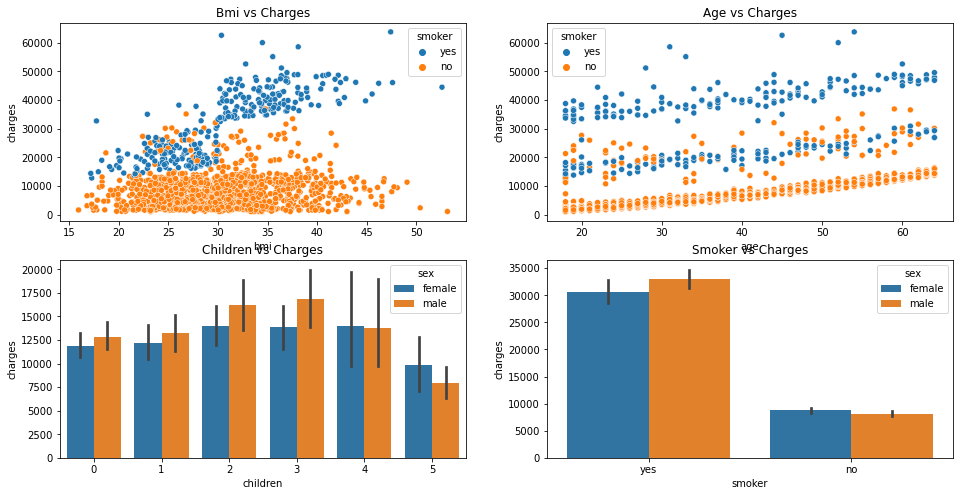

In [45]:
# Initialise the subplot function using number of rows and columns
figure, axis = plt.subplots(2, 2, figsize=(16, 8))
  
# For Sine Function

sns.scatterplot(ax=axis[0, 0],x=df.bmi,y=df.charges,data=df,hue='smoker')

axis[0, 0].set_title("Bmi vs Charges")
  
sns.scatterplot(ax=axis[0,1],x=df.age,y=df.charges,data=df,hue='smoker')

axis[0, 1].set_title("Age vs Charges")
  
# For Tangent Function
sns.barplot(ax=axis[1,1],x=df.smoker,y=df.charges,data=df,hue='sex')
axis[1, 1].set_title("Smoker vs Charges")
  
# For Tanh Function
sns.barplot(ax=axis[1,0],x=df.children,y=df.charges,data=df,hue='sex')
axis[1, 0].set_title("Children vs Charges")
  
# Combine all the operations and display
plt.show()


In [46]:
df['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

Text(0.5, 1.0, 'Age vs Bmi')

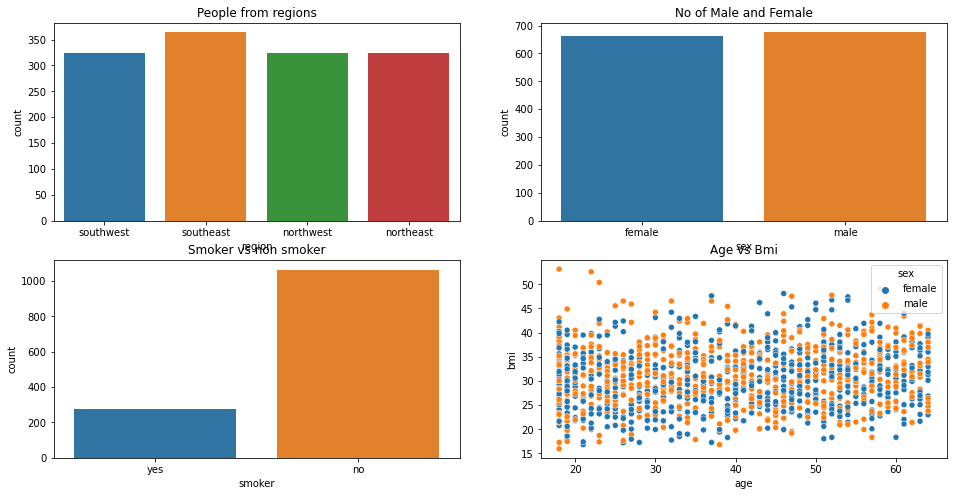

In [47]:
figure, axis = plt.subplots(2, 2, figsize=(16, 8))
sns.countplot(ax=axis[0,0],x=df.region)

axis[0,0].set_title("People from regions")
  
sns.countplot(ax=axis[0,1],x=df.sex)

axis[0,1].set_title("No of Male and Female")

sns.countplot(ax=axis[1,0],x=df.smoker)
axis[1, 0].set_title("Smoker vs non smoker")

sns.scatterplot(ax=axis[1,1],x=df.age,y=df.bmi,data=df,hue='sex')
axis[1, 1].set_title("Age vs Bmi")

In [48]:
df=pd.get_dummies(df,columns=['sex','smoker','region'])

In [49]:
df

age     bmi  children      charges  sex_female  sex_male  smoker_no  \
0      19  27.900         0  16884.92400           1         0          0   
1      18  33.770         1   1725.55230           0         1          1   
2      28  33.000         3   4449.46200           0         1          1   
3      33  22.705         0  21984.47061           0         1          1   
4      32  28.880         0   3866.85520           0         1          1   
...   ...     ...       ...          ...         ...       ...        ...   
1333   50  30.970         3  10600.54830           0         1          1   
1334   18  31.920         0   2205.98080           1         0          1   
1335   18  36.850         0   1629.83350           1         0          1   
1336   21  25.800         0   2007.94500           1         0          1   
1337   61  29.070         0  29141.36030           1         0          0   

      smoker_yes  region_northeast  region_northwest  region_southeast  \
0              1                 0                 0                 0   
1              0                 0                 0                 1   
2              0                 0                 0                 1   
3              0                 0                 1                 0   
4              0                 0                 1                 0   
...          ...               ...               ...               ...   
1333           0                 0                 1                 0   
1334           0                 1                 0                 0   
1335           0                 0                 0                 1   
1336           0                 0                 0                 0   
1337           1                 0                 1                 0   

      region_southwest  
0                    1  
1                    0  
2                    0  
3                    0  
4                    0  
...                ...  
1333                 0  
1334                 0  
1335                 0  
1336                 1  
1337                 0  

[1338 rows x 12 columns]

In [50]:
df.describe()

age          bmi     children       charges   sex_female  \
count  1338.000000  1338.000000  1338.000000   1338.000000  1338.000000   
mean     39.207025    30.663397     1.094918  13270.422265     0.494768   
std      14.049960     6.098187     1.205493  12110.011237     0.500160   
min      18.000000    15.960000     0.000000   1121.873900     0.000000   
25%      27.000000    26.296250     0.000000   4740.287150     0.000000   
50%      39.000000    30.400000     1.000000   9382.033000     0.000000   
75%      51.000000    34.693750     2.000000  16639.912515     1.000000   
max      64.000000    53.130000     5.000000  63770.428010     1.000000   

          sex_male    smoker_no   smoker_yes  region_northeast  \
count  1338.000000  1338.000000  1338.000000       1338.000000   
mean      0.505232     0.795217     0.204783          0.242152   
std       0.500160     0.403694     0.403694          0.428546   
min       0.000000     0.000000     0.000000          0.000000   
25%       0.000000     1.000000     0.000000          0.000000   
50%       1.000000     1.000000     0.000000          0.000000   
75%       1.000000     1.000000     0.000000          0.000000   
max       1.000000     1.000000     1.000000          1.000000   

       region_northwest  region_southeast  region_southwest  
count       1338.000000       1338.000000       1338.000000  
mean           0.242900          0.272048          0.242900  
std            0.428995          0.445181          0.428995  
min            0.000000          0.000000          0.000000  
25%            0.000000          0.000000          0.000000  
50%            0.000000          0.000000          0.000000  
75%            0.000000          1.000000          0.000000  
max            1.000000          1.000000          1.000000

In [51]:
df.nunique()

age                   47
bmi                  548
children               6
charges             1337
sex_female             2
sex_male               2
smoker_no              2
smoker_yes             2
region_northeast       2
region_northwest       2
region_southeast       2
region_southwest       2
dtype: int64

Now we will check if there is any missing value

In [52]:
df.isnull().sum()



age                 0
bmi                 0
children            0
charges             0
sex_female          0
sex_male            0
smoker_no           0
smoker_yes          0
region_northeast    0
region_northwest    0
region_southeast    0
region_southwest    0
dtype: int64

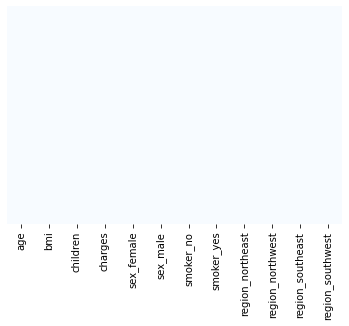

In [53]:
import seaborn as sns
sns.heatmap(df.isnull(), cmap='Blues', cbar=False, yticklabels=False, xticklabels=df.columns);

In [54]:
df.corr()

age       bmi  children   charges  sex_female  \
age               1.000000  0.109272  0.042469  0.299008    0.020856   
bmi               0.109272  1.000000  0.012759  0.198341   -0.046371   
children          0.042469  0.012759  1.000000  0.067998   -0.017163   
charges           0.299008  0.198341  0.067998  1.000000   -0.057292   
sex_female        0.020856 -0.046371 -0.017163 -0.057292    1.000000   
sex_male         -0.020856  0.046371  0.017163  0.057292   -1.000000   
smoker_no         0.025019 -0.003750 -0.007673 -0.787251    0.076185   
smoker_yes       -0.025019  0.003750  0.007673  0.787251   -0.076185   
region_northeast  0.002475 -0.138156 -0.022808  0.006349    0.002425   
region_northwest -0.000407 -0.135996  0.024806 -0.039905    0.011156   
region_southeast -0.011642  0.270025 -0.023066  0.073982   -0.017117   
region_southwest  0.010016 -0.006205  0.021914 -0.043210    0.004184   

                  sex_male  smoker_no  smoker_yes  region_northeast  \
age              -0.020856   0.025019   -0.025019          0.002475   
bmi               0.046371  -0.003750    0.003750         -0.138156   
children          0.017163  -0.007673    0.007673         -0.022808   
charges           0.057292  -0.787251    0.787251          0.006349   
sex_female       -1.000000   0.076185   -0.076185          0.002425   
sex_male          1.000000  -0.076185    0.076185         -0.002425   
smoker_no        -0.076185   1.000000   -1.000000         -0.002811   
smoker_yes        0.076185  -1.000000    1.000000          0.002811   
region_northeast -0.002425  -0.002811    0.002811          1.000000   
region_northwest -0.011156   0.036945   -0.036945         -0.320177   
region_southeast  0.017117  -0.068498    0.068498         -0.345561   
region_southwest -0.004184   0.036945   -0.036945         -0.320177   

                  region_northwest  region_southeast  region_southwest  
age                      -0.000407         -0.011642          0.010016  
bmi                      -0.135996          0.270025         -0.006205  
children                  0.024806         -0.023066          0.021914  
charges                  -0.039905          0.073982         -0.043210  
sex_female                0.011156         -0.017117          0.004184  
sex_male                 -0.011156          0.017117         -0.004184  
smoker_no                 0.036945         -0.068498          0.036945  
smoker_yes               -0.036945          0.068498         -0.036945  
region_northeast         -0.320177         -0.345561         -0.320177  
region_northwest          1.000000         -0.346265         -0.320829  
region_southeast         -0.346265          1.000000         -0.346265  
region_southwest         -0.320829         -0.346265          1.000000

In [55]:

# corr = df.corr() 
# # Displaying dataframe as an heatmap 
# # with diverging colourmap as coolwarm
# corr.style.background_gradient(cmap ='coolwarm')


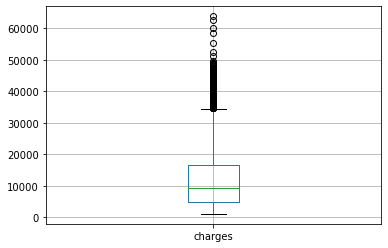

In [56]:
from matplotlib.pyplot import boxplot
boxplot = df.boxplot(column=['charges'])  

### Outlier Detection

In [57]:
# import numpy as np
# import pandas as pd
# import matplotlib.pyplot as plt
# %matplotlib inline


In [58]:
# def outlier_treatment(datacolumn):
#  sorted(datacolumn)
#  Q1,Q3 = np.percentile(datacolumn , [25,60])
#  IQR = Q3 - Q1
#  lower_range = Q1 - (1.5 * IQR)
#  upper_range = Q3 + (1.5 * IQR)
#  return lower_range,upper_range

In [59]:
# lowerbound,upperbound = outlier_treatment(df.charges)

In [60]:
# df.drop(df[ (df.charges> upperbound) | (df.charges < lowerbound) ].index , inplace=True)
# df.shape

In [61]:
outliers=[]
def detect_outliers(data):
    
    threshold=3
    mean = np.mean(data)
    std =np.std(data)
    
    print(mean,std)
    for i in data:
        z_score= (i - mean)/std 
        if np.abs(z_score) > threshold:
            outliers.append(i)
            
    return outliers

In [62]:
my_array = df['charges'].to_numpy()
outlier_pt=detect_outliers(my_array)
outlier_pt

13270.422265141257 12105.484975561612


[51194.55914,
 63770.42801,
 58571.074479999996,
 55135.402089999996,
 52590.82939,
 60021.39897,
 62592.87309]

In [63]:


for i in outlier_pt:
    index_name = df[ df['charges'] == i ].index
    df.drop(index_name, inplace = True)
# drop these row indexes
# from dataFrame

  
df.shape

(1331, 12)

(1331, 12)

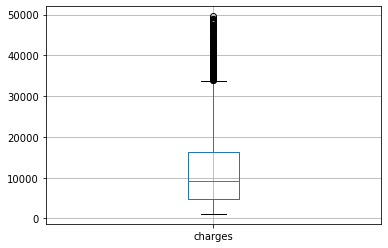

In [64]:
from matplotlib.pyplot import boxplot
boxplot = df.boxplot(column=['charges'])  
df.shape

In [65]:
df_k=df.drop(['smoker_no','sex_female'],axis=1)
df_k.to_csv('file1.csv')

## fEATURE SELECTION


In [66]:
insurance_data=df

In [89]:
y = insurance_data.charges
X = insurance_data[['smoker_yes','age','bmi','children','region_northeast','region_northwest']]

In [90]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,random_state=25)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(1064, 6) (267, 6) (1064,) (267,)


In [91]:
import statsmodels.api as sm
X_con= sm.add_constant(X_train)

In [92]:
model_1 = sm.OLS(y_train, X_con)
result_1 = model_1.fit()
result_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.756
Model:                            OLS   Adj. R-squared:                  0.755
Method:                 Least Squares   F-statistic:                     546.3
Date:                Sat, 18 Jun 2022   Prob (F-statistic):          9.67e-320
Time:                        10:07:36   Log-Likelihood:                -10732.
No. Observations:                1064   AIC:                         2.148e+04
Df Residuals:                    1057   BIC:                         2.151e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -1.278e+04   1079.743    -11.833      0.000   -1.49e+04   -1.07e+04
smoker_yes        2.319e+04    446.365     51.953      0.000    2.23e+04    2.41e+04
age                256.5258     12.797     20.046      0.000     231.416     281.636
bmi                329.5645     30.297     10.878      0.000     270.115     389.014
children           530.5571    146.289      3.627      0.000     243.508     817.606
region_northeast  1222.5166    445.453      2.744      0.006     348.444    2096.589
region_northwest   690.6990    454.175      1.521      0.129    -200.488    1581.886
==============================================================================
Omnibus:                      198.637   Durbin-Watson:                   1.888
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              373.320
Skew:                           1.111   Prob(JB):                     8.60e-82
Kurtosis:                       4.866   Cond. No.                         315.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [29]:
import plotly.express as px

plt.figure()
px.scatter(df,x='bmi',y='charges',color='age', color_continuous_scale='RdBu')


<Figure size 432x288 with 0 Axes>

In [471]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

poly = PolynomialFeatures(degree=2)
poly_variables = poly.fit_transform(df)

poly_var_train, poly_var_test, res_train, res_test = train_test_split(poly_variables, results, test_size = 0.3, random_state = 4)

regression = linear_model.LinearRegression()

model = regression.fit(poly_var_train, res_train)
score = model.score(poly_var_test, res_test)


NameError: name 'results' is not defined

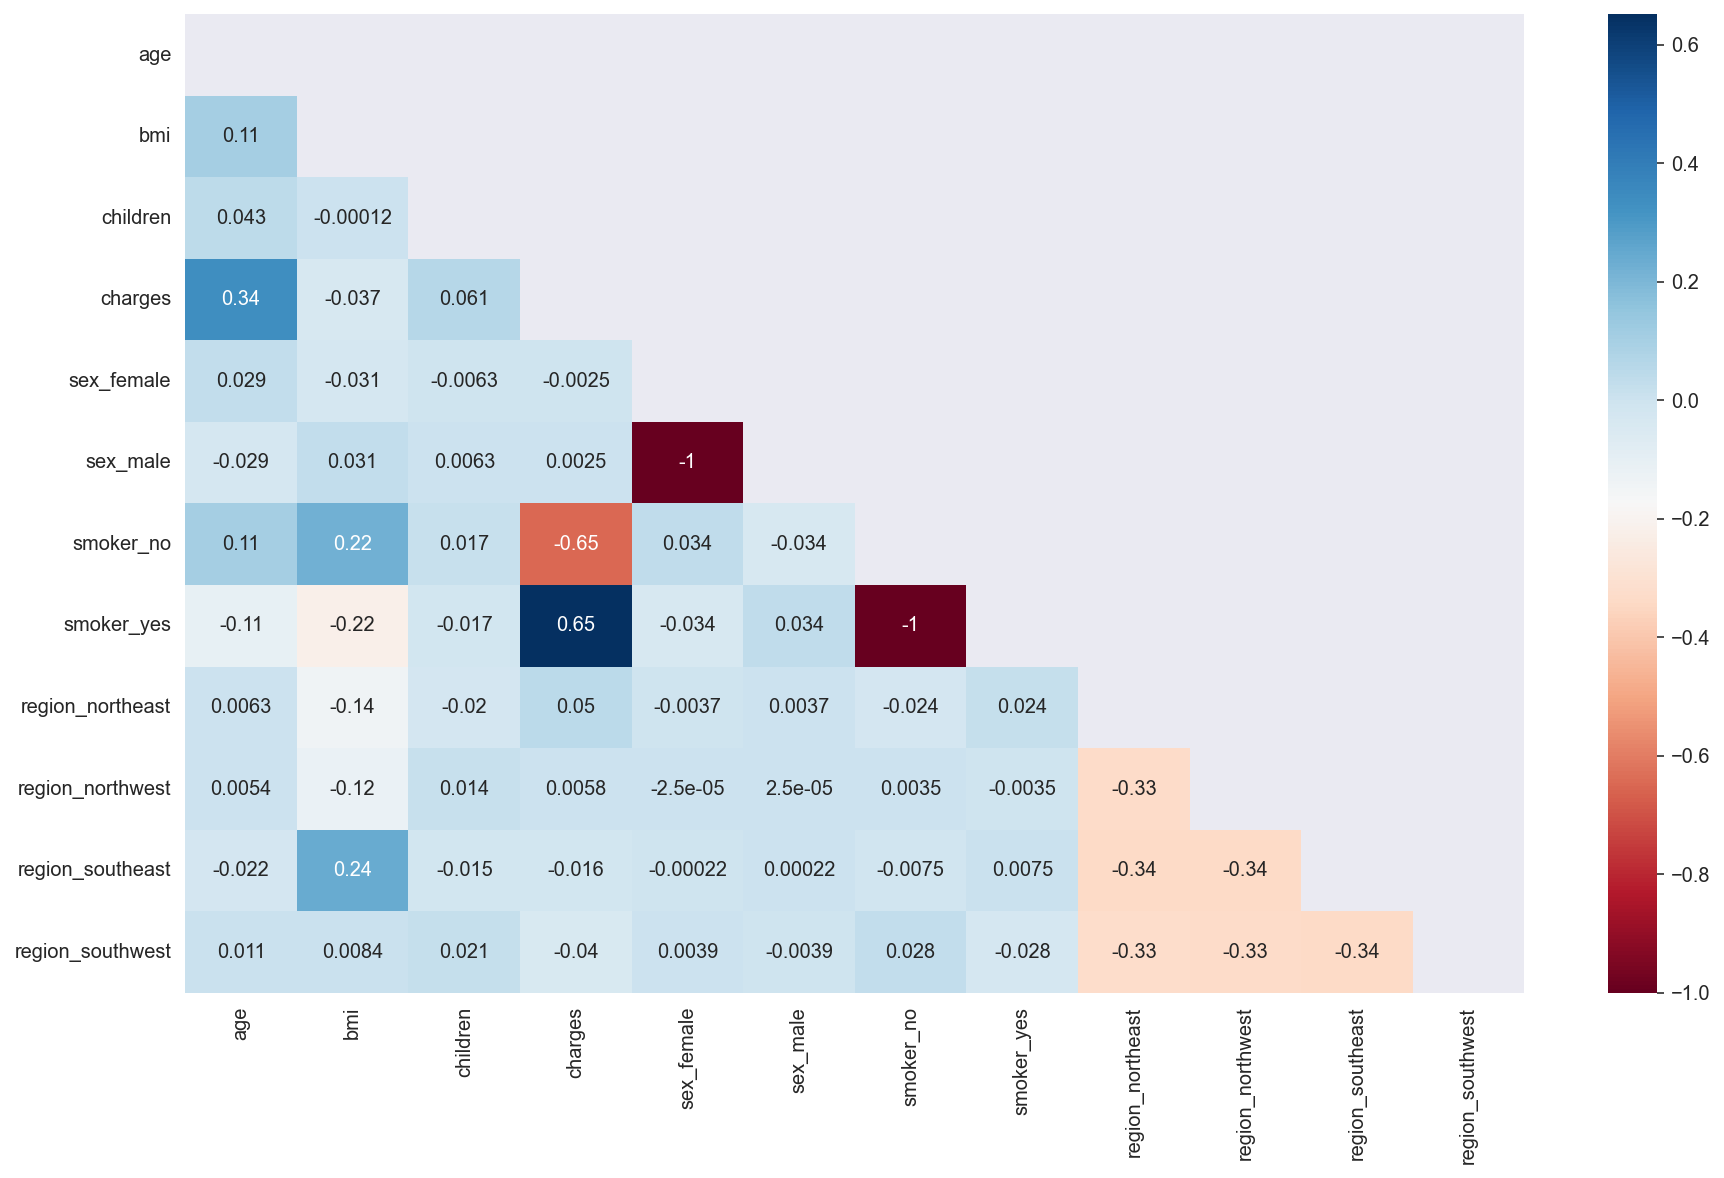

In [472]:
#heatmap
mask = np.triu(np.ones_like(df.corr()))
 
sns.heatmap(df.corr(),cmap="RdBu", annot=True,mask=mask)
plt.show()

In [473]:
X,y=df.drop(['sex_male','sex_female','children','smoker_no','region_northeast','region_northwest','region_southeast','region_southwest','charges'],axis=1),df['charges']

In [474]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,random_state=28)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


(976, 3) (244, 3) (976,) (244,)


As VIF of both bmi and age  are greater than 5, We can say they have collinearity effect .So, We have to eliminate one of them.We will eliminate bmi effect.

In [475]:
from sklearn import for


SyntaxError: invalid syntax (Temp/ipykernel_6876/813146355.py, line 1)

In [476]:
import statsmodels.api as sm
X_constant = sm.add_constant(X)
model=sm.OLS(y,X_constant).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.601
Model:                            OLS   Adj. R-squared:                  0.600
Method:                 Least Squares   F-statistic:                     609.3
Date:                Sat, 18 Jun 2022   Prob (F-statistic):          1.09e-241
Time:                        00:55:22   Log-Likelihood:                -12122.
No. Observations:                1220   AIC:                         2.425e+04
Df Residuals:                    1216   BIC:                         2.427e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -3754.6795    840.297     -4.468      0.000   -5403.272   -2106.087
age          229.6846     10.268     22.369      0.000     209.540     249.830
bmi          101.1031     24.658      4.100      0.000      52.726     149.480
smoker_yes  1.678e+04    439.423     38.188      0.000    1.59e+04    1.76e+04
==============================================================================
Omnibus:                      631.959   Durbin-Watson:                   2.065
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3047.412
Skew:                           2.525   Prob(JB):                         0.00
Kurtosis:                       8.868   Cond. No.                         301.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Now the available columns are multicolinearity free

### Dataset devided into training and testing dataset

In [477]:
X,y=df.drop(['charges','sex_female','smoker_no'],axis=1),df['charges']


In [478]:

training_data, testing_data = train_test_split(df, test_size=0.20, random_state=25)

print(f"No. of training examples: {training_data.shape[0]}")
print(f"No. of testing examples: {testing_data.shape[0]}")

No. of training examples: 976
No. of testing examples: 244


In [479]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,random_state=25)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


(976, 9) (244, 9) (976,) (244,)


### Multiple REGRESSION model

In [480]:
model1=LinearRegression()
model1.fit(X_train, y_train)

LinearRegression()

In [481]:
y_pred=model1.predict(X_test)

In [482]:
from sklearn.metrics import mean_absolute_error

model_error = mean_absolute_error(y_test,y_pred)
print(f"The mean absolute error of the optimal model is {model_error:.2f} g")

The mean absolute error of the optimal model is 2992.86 g


In [483]:
print('The accuracy of train data',model1.score(X_train, y_train))
print('The accuracy of test data',model1.score(X_test, y_test))

The accuracy of train data 0.5987108758006117
The accuracy of test data 0.6292087227927012


In [484]:
r2=metrics.r2_score(y_test,y_pred)

In [485]:
from sklearn.metrics import mean_squared_error 
from math import sqrt
result_df = pd.DataFrame()
adj_r2 = 1 - ((1 - r2) * (len(X_test) - 1) / (len(X_test)-6- 1))
mse=mean_squared_error(y_test,y_pred)
error = sqrt(mse) #calculate rmse
  #store rmse values
    
result_df = result_df.append(pd.DataFrame({'r2': r2,
                                              'adj_r2': adj_r2,'mse':mse,'rmse':error}, index=[i]))

result_df

r2    adj_r2           mse         rmse
43896.3763  0.629209  0.619822  2.413647e+07  4912.888058

In [486]:
import statsmodels.api as sm
X_constant = sm.add_constant(X_train)
model=sm.OLS(y_train,X_constant).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.599
Model:                            OLS   Adj. R-squared:                  0.595
Method:                 Least Squares   F-statistic:                     180.3
Date:                Sat, 18 Jun 2022   Prob (F-statistic):          7.68e-186
Time:                        00:55:37   Log-Likelihood:                -9695.0
No. Observations:                 976   AIC:                         1.941e+04
Df Residuals:                     967   BIC:                         1.945e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -2600.0084    784.800     -3.313      0.001   -4140.116   -1059.900
age                226.1568     11.549     19.583      0.000     203.493     248.821
bmi                 86.1794     28.562      3.017      0.003      30.129     142.230
children           217.2385    132.412      1.641      0.101     -42.610     477.087
sex_male          -227.2200    321.233     -0.707      0.480    -857.614     403.174
smoker_yes        1.641e+04    493.064     33.287      0.000    1.54e+04    1.74e+04
region_northeast  -196.2362    324.471     -0.605      0.545    -832.985     440.513
region_northwest  -531.6997    326.099     -1.630      0.103   -1171.642     108.243
region_southeast -1101.0893    376.028     -2.928      0.003   -1839.014    -363.164
region_southwest  -770.9832    344.475     -2.238      0.025   -1446.988     -94.979
==============================================================================
Omnibus:                      535.268   Durbin-Watson:                   2.126
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2777.670
Skew:                           2.646   Prob(JB):                         0.00
Kurtosis:                       9.349   Cond. No.                     7.13e+17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 4.95e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [487]:
# r2=
# adj_r2 = 1 - ((1 - r2) * (len(X_test) - 1) / (len(X_test)-6- 1))

### Linearity Check

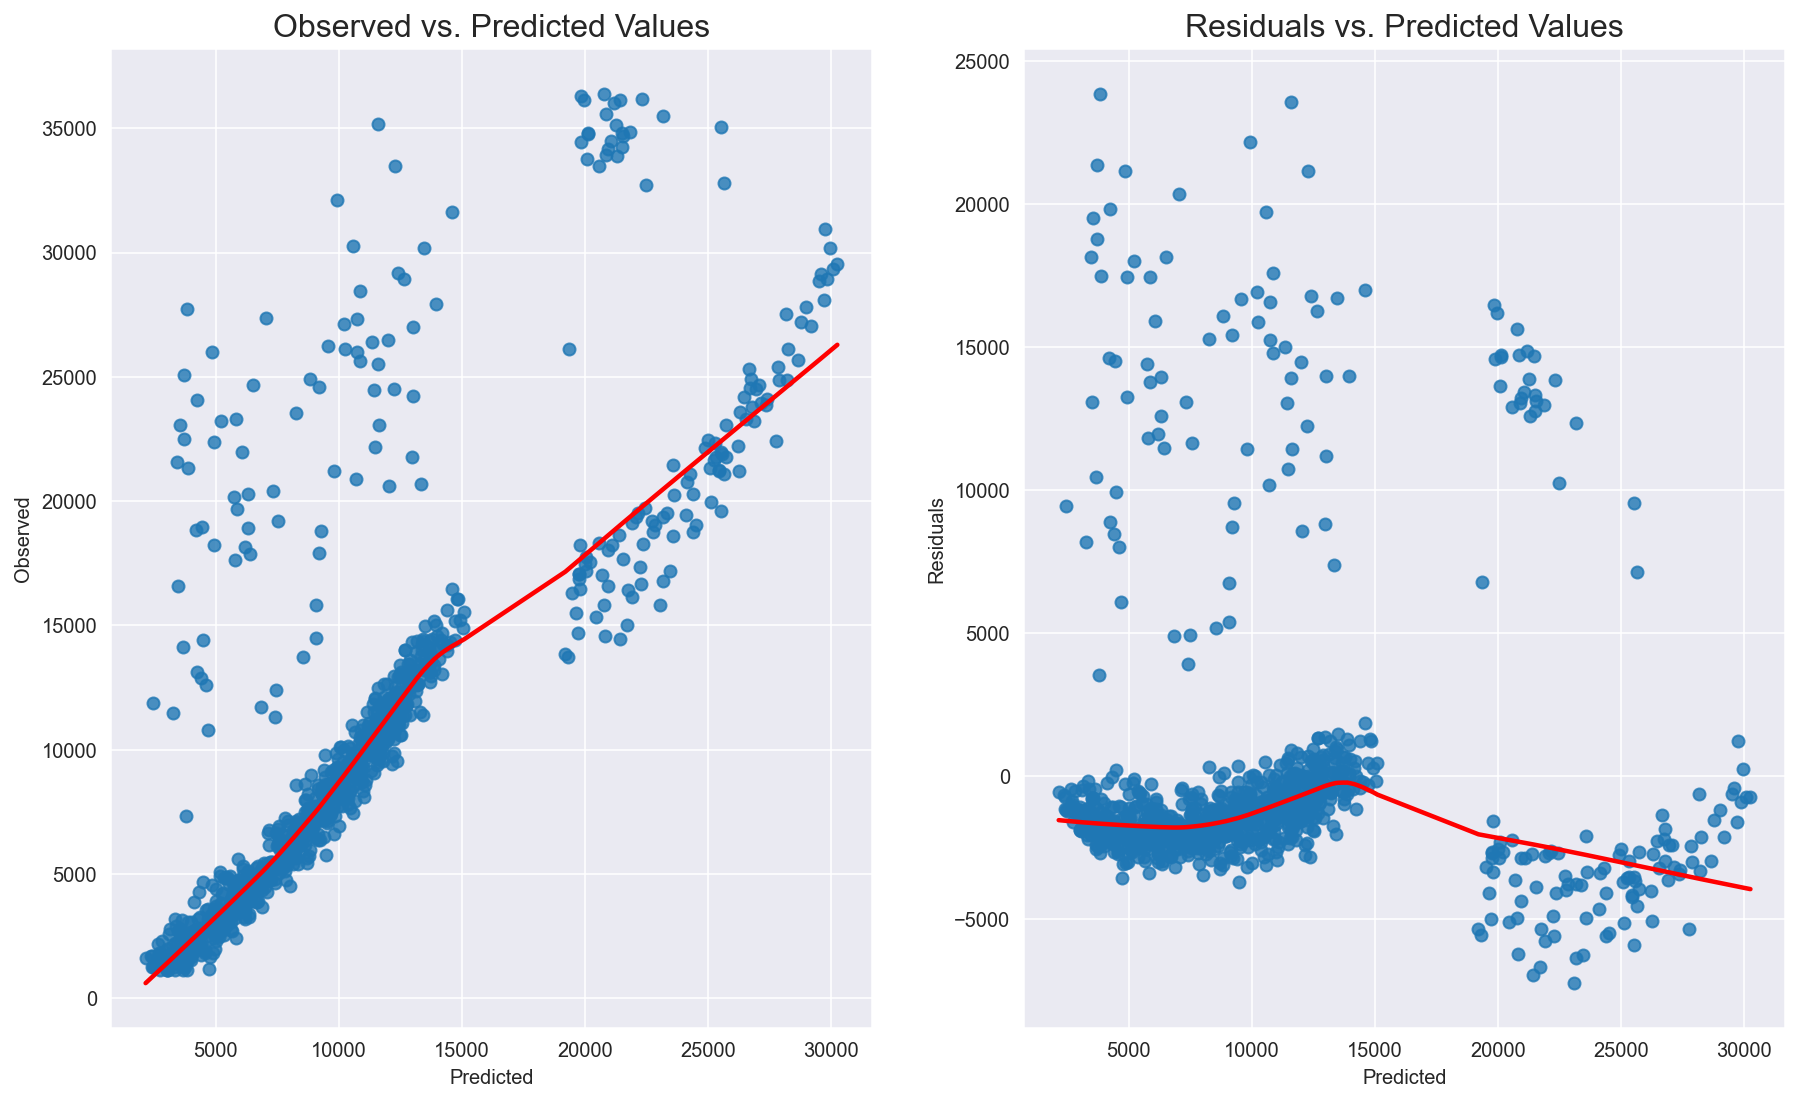

In [488]:
%matplotlib inline
%config InlineBackend.figure_format ='retina'
import seaborn as sns 
import matplotlib.pyplot as plt
import statsmodels.stats.api as sms
sns.set_style('darkgrid')
sns.mpl.rcParams['figure.figsize'] = (15.0, 9.0)

def linearity_test(model, y):
    '''
    Function for visually inspecting the assumption of linearity in a linear regression model.
    It plots observed vs. predicted values and residuals vs. predicted values.
    
    Args:
    * model - fitted OLS model from statsmodels
    * y - observed values
    '''
    fitted_vals = model.predict()
    resids = model.resid

    fig, ax = plt.subplots(1,2)
    
    sns.regplot(x=fitted_vals, y=y, lowess=True, ax=ax[0], line_kws={'color': 'red'})
    ax[0].set_title('Observed vs. Predicted Values', fontsize=16)
    ax[0].set(xlabel='Predicted', ylabel='Observed')

    sns.regplot(x=fitted_vals, y=resids, lowess=True, ax=ax[1], line_kws={'color': 'red'})
    ax[1].set_title('Residuals vs. Predicted Values', fontsize=16)
    ax[1].set(xlabel='Predicted', ylabel='Residuals')
    
linearity_test(model,y_train) 

In [454]:
import numpy as np
import statsmodels.api as sm
import pylab as py
  
# np.random generates different random numbers
# whenever the code is executed
# Note: When you execute the same code 
# the graph look different than shown below.
  
# Random data points generated
   
  
sm.qqplot(x, line ='45')
py.show()

NameError: name 'x' is not defined

In [ ]:
import numpy as np 
import pylab 
import scipy.stats as stats

stats.probplot(df['charges'], dist="norm", plot=pylab)
pylab.show()

### Homoscadasticity check

In [ ]:
%matplotlib inline
%config InlineBackend.figure_format ='retina'
import seaborn as sns 
import matplotlib.pyplot as plt
import statsmodels.stats.api as sms
sns.set_style('darkgrid')
sns.mpl.rcParams['figure.figsize'] = (12.0, 8.0)

def homoscedasticity_test(model):
    '''
    Function for testing the homoscedasticity of residuals in a linear regression model.
    It plots residuals and standardized residuals vs. fitted values and runs Breusch-Pagan and Goldfeld-Quandt tests.
    
    Args:
    * model - fitted OLS model from statsmodels
    '''
    fitted_vals = model.predict()
    resids = model.resid
    resids_standardized = model.get_influence().resid_studentized_internal

    fig, ax = plt.subplots(1,2)

    sns.regplot(x=fitted_vals, y=resids, lowess=True, ax=ax[0], line_kws={'color': 'red'})
    ax[0].set_title('Residuals vs Fitted', fontsize=16)
    ax[0].set(xlabel='Fitted Values', ylabel='Residuals')

    sns.regplot(x=fitted_vals, y=np.sqrt(np.abs(resids_standardized)), lowess=True, ax=ax[1], line_kws={'color': 'red'})
    ax[1].set_title('Scale-Location', fontsize=16)
    ax[1].set(xlabel='Fitted Values', ylabel='sqrt(abs(Residuals))')

    bp_test = pd.DataFrame(sms.het_breuschpagan(resids, model.model.exog), 
                           columns=['value'],
                           index=['Lagrange multiplier statistic', 'p-value', 'f-value', 'f p-value'])

    gq_test = pd.DataFrame(sms.het_goldfeldquandt(resids, model.model.exog)[:-1],
                           columns=['value'],
                           index=['F statistic', 'p-value'])

    print('\n Breusch-Pagan test ----')
    print(bp_test)
    print('\n Goldfeld-Quandt test ----')
    print(gq_test)
    print('\n Residuals plots ----')

homoscedasticity_test(model)

### Multicollinearity check

In [455]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)
df_n=df.drop(['charges'],axis=1)
X = df_n.iloc[:,:]
calc_vif(X)

# df_new=df_n.drop(['sex_male'],axis=1)
# X = df_new.iloc[:,:-1]
# calc_vif(X)

variables       VIF
0                age  1.017003
1                bmi  1.107703
2           children  1.004098
3         sex_female       inf
4           sex_male       inf
5          smoker_no       inf
6         smoker_yes       inf
7   region_northeast       inf
8   region_northwest       inf
9   region_southeast       inf
10  region_southwest       inf

### Autocorrelation check

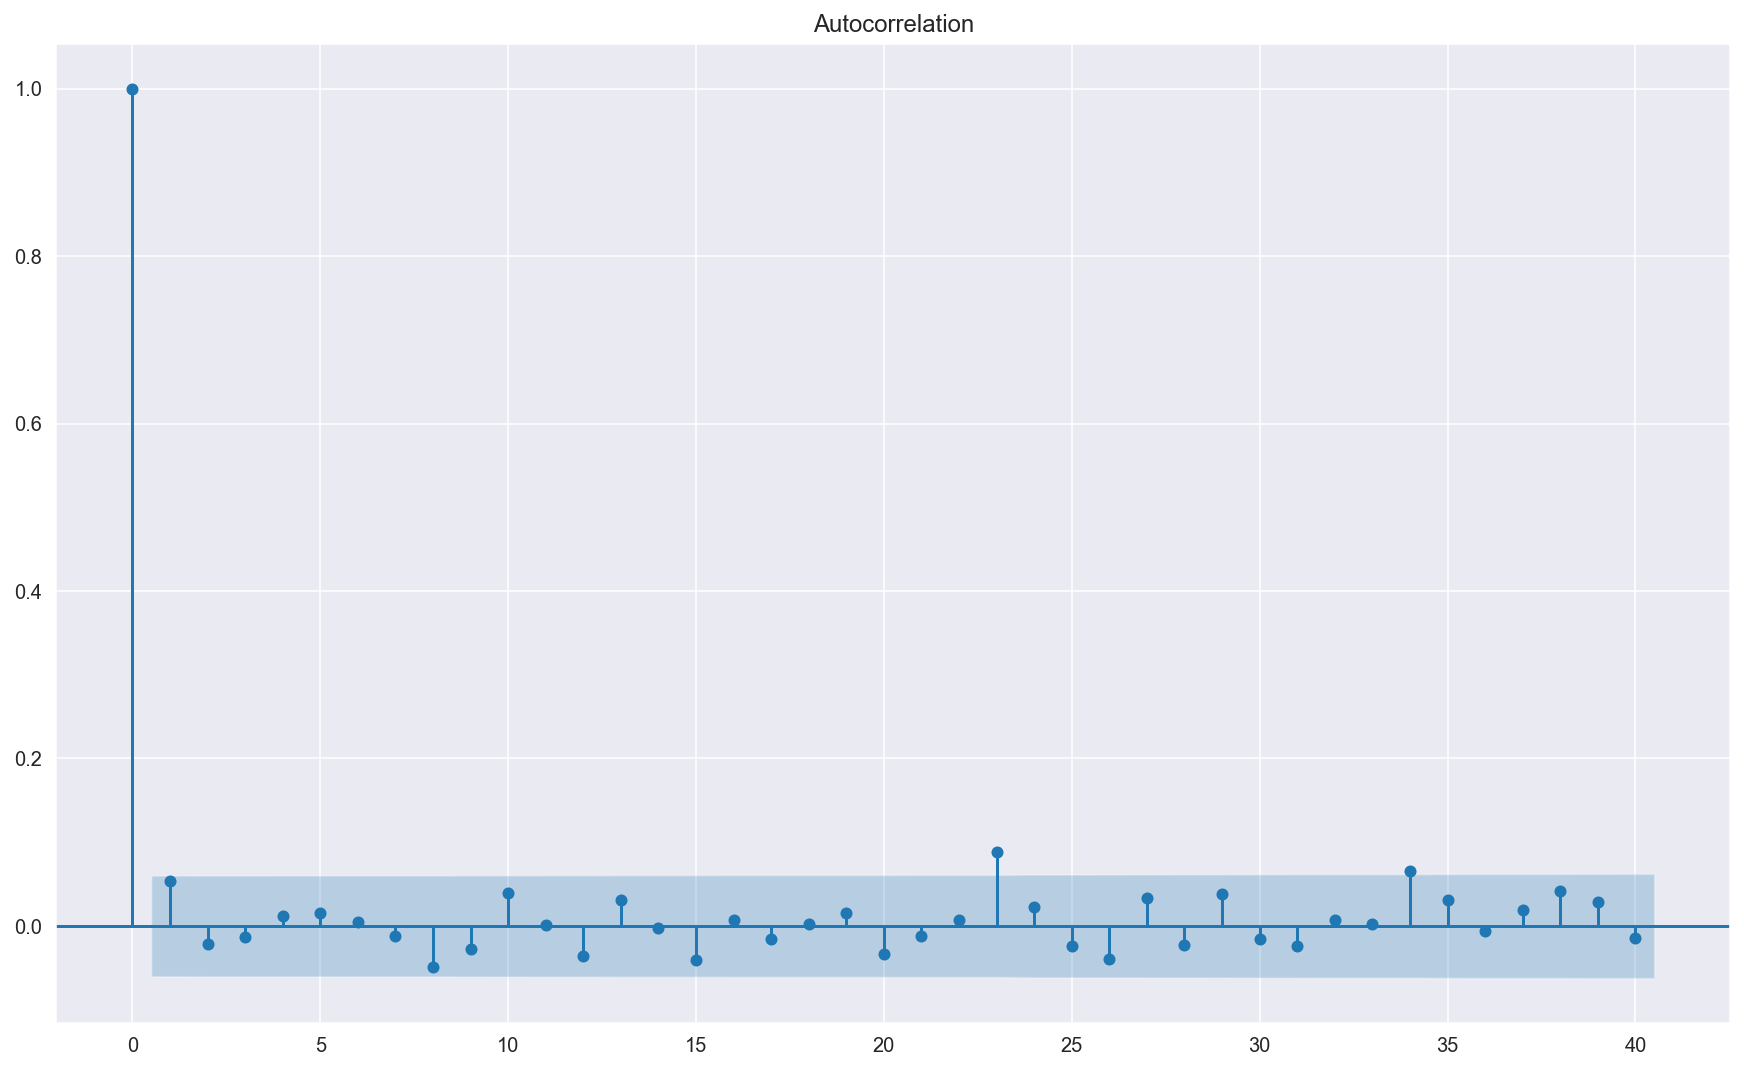

In [456]:
import statsmodels.tsa.api as smt

acf = smt.graphics.plot_acf(model.resid, lags=40 , alpha=0.05)
acf.show()

In [457]:
import numpy as np
from scipy.stats import shapiro
from numpy.random import randn
  
#
resids = model.resid
# conduct the  Shapiro-Wilk Test
shapiro(resids)

ShapiroResult(statistic=0.9053727984428406, pvalue=3.830932148516057e-25)

In [458]:
from numpy.random import seed
from numpy.random import randn
from statsmodels.graphics.gofplots import qqplot
from matplotlib import pyplot
# seed the random number generator
seed(1)
# generate univariate observations
data = model.predict(X_train)
# q-q plot
qqplot(data, line='s')
pyplot.show()

ValueError: shapes (1064,9) and (10,) not aligned: 9 (dim 1) != 10 (dim 0)

## Log transformation of charges

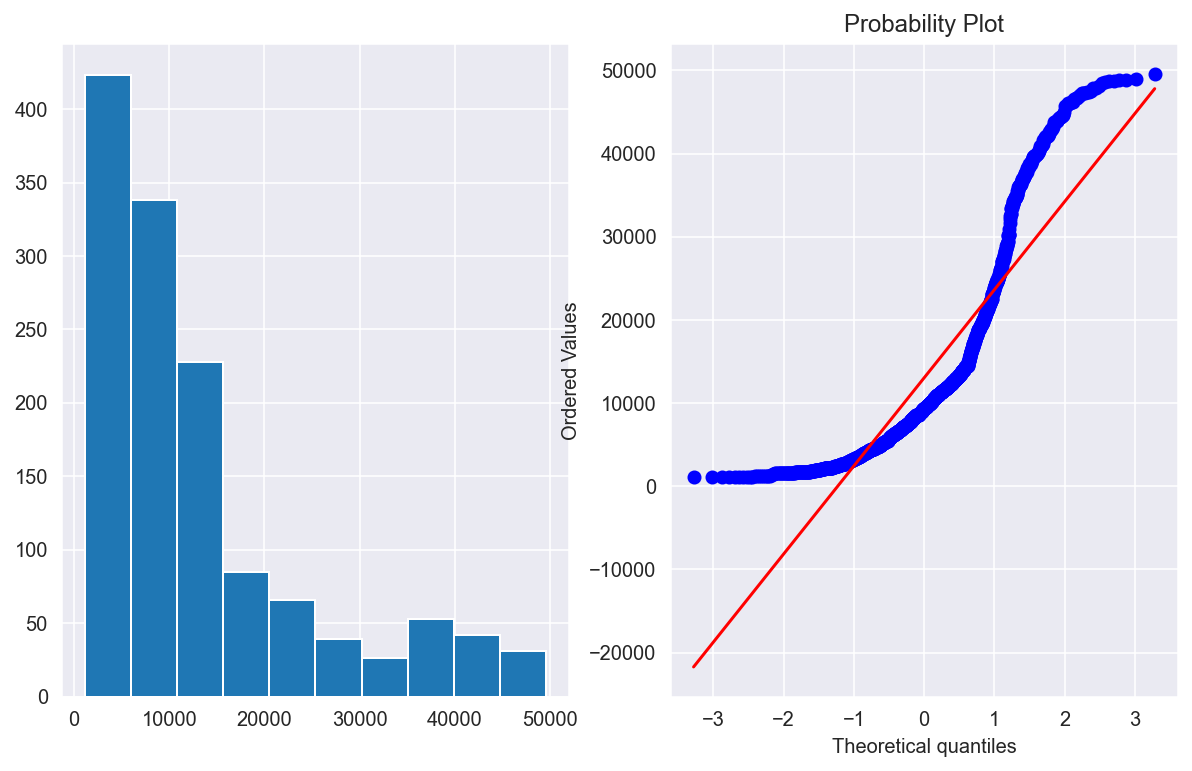

In [459]:
import scipy.stats as stat
import pylab 
def plot_data(df,feature):
    plt.figure(figsize=(10,6))
    plt.subplot(1,2,1)
    df[feature].hist()
    plt.subplot(1,2,2)
    stat.probplot(df[feature],dist='norm',plot=pylab)
    plt.show()
plot_data(df,'charges')

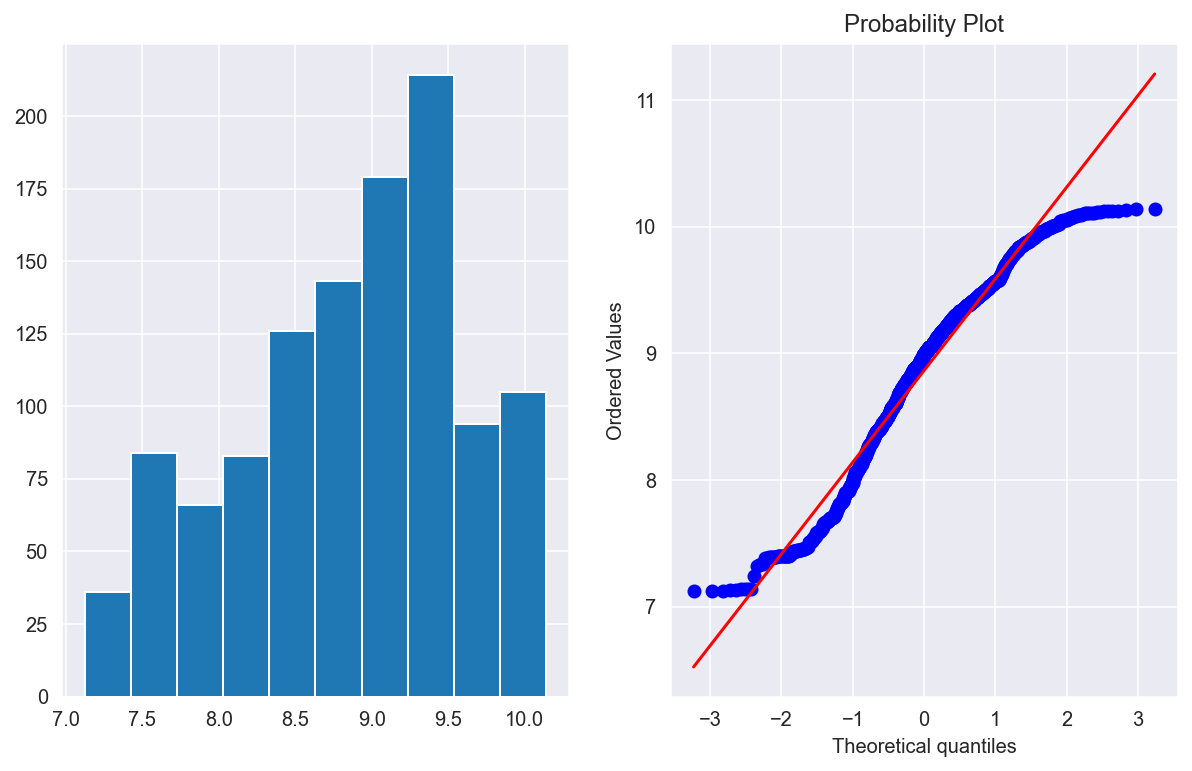

In [158]:
df['charges_log']=np.log(df['charges'])
plot_data(df,'charges_log')

In [161]:
df_log=df[['age','sex_male','sex_female','children','smoker_no','smoker_yes','region_northeast','region_northwest','region_southeast','region_southwest','charges_log']]

In [490]:
X,y=df.drop(['charges','smoker_no','sex_male','sex_female'],axis=1),df['charges']

In [491]:
feature_names=['age','bmi','sex_male','sex_female','children',,'smoker_yes','region_northeast','region_northwest','region_southeast','region_southwest']

SyntaxError: invalid syntax (Temp/ipykernel_6876/75022897.py, line 1)

In [492]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


(976, 8) (244, 8) (976,) (244,)


In [493]:
import statsmodels.api as sm
X_constant = sm.add_constant(X_train)
model=sm.OLS(y_train,X_constant).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.601
Model:                            OLS   Adj. R-squared:                  0.598
Method:                 Least Squares   F-statistic:                     208.3
Date:                Sat, 18 Jun 2022   Prob (F-statistic):          3.08e-188
Time:                        01:21:11   Log-Likelihood:                -9715.4
No. Observations:                 976   AIC:                         1.945e+04
Df Residuals:                     968   BIC:                         1.949e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -3508.8222    791.772     -4.432      0.000   -5062.610   -1955.034
age                231.5454     11.801     19.621      0.000     208.387     254.704
bmi                107.5881     29.232      3.681      0.000      50.223     164.953
children           397.2074    136.847      2.903      0.004     128.656     665.759
smoker_yes        1.706e+04    498.647     34.212      0.000    1.61e+04     1.8e+04
region_northeast  -318.7652    325.858     -0.978      0.328    -958.234     320.704
region_northwest  -640.5048    329.638     -1.943      0.052   -1287.392       6.382
region_southeast -1278.2633    383.661     -3.332      0.001   -2031.167    -525.360
region_southwest -1271.2890    352.364     -3.608      0.000   -1962.774    -579.804
==============================================================================
Omnibus:                      494.897   Durbin-Watson:                   2.093
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2210.296
Skew:                           2.475   Prob(JB):                         0.00
Kurtosis:                       8.463   Cond. No.                     5.40e+17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 8.54e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [167]:
model.resid.mean()

2.6636510106736832e-14


 Breusch-Pagan test ----
                                      value
Lagrange multiplier statistic  8.497302e+01
p-value                        4.852368e-15
f-value                        1.309340e+01
f p-value                      3.038181e-16

 Goldfeld-Quandt test ----
                value
F statistic  0.733462
p-value      0.999799

 Residuals plots ----


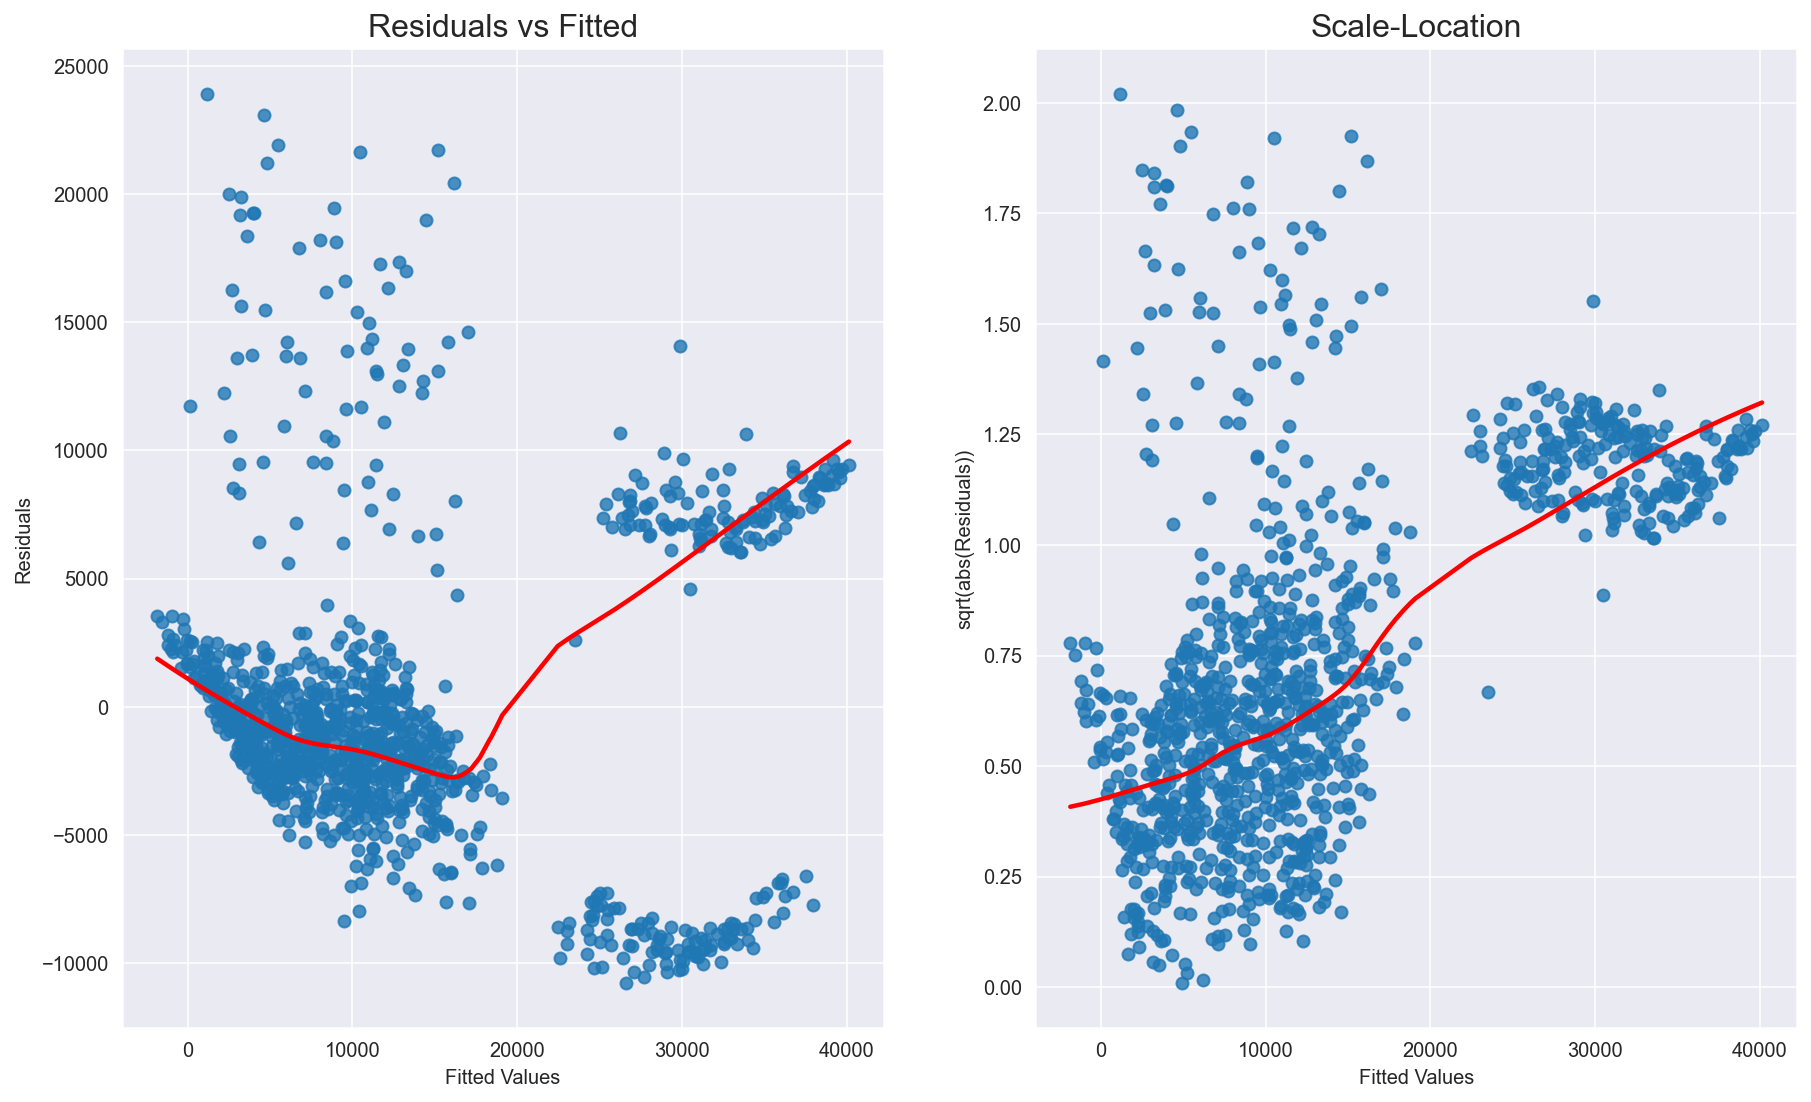

In [464]:
homoscedasticity_test(model)

In [ ]:
for i

## Box cox transformation

In [159]:
df['charges_Boxcox'],parameters=stat.boxcox(df['charges'])
df1=df.drop(['charges_log','charges'],axis=1)

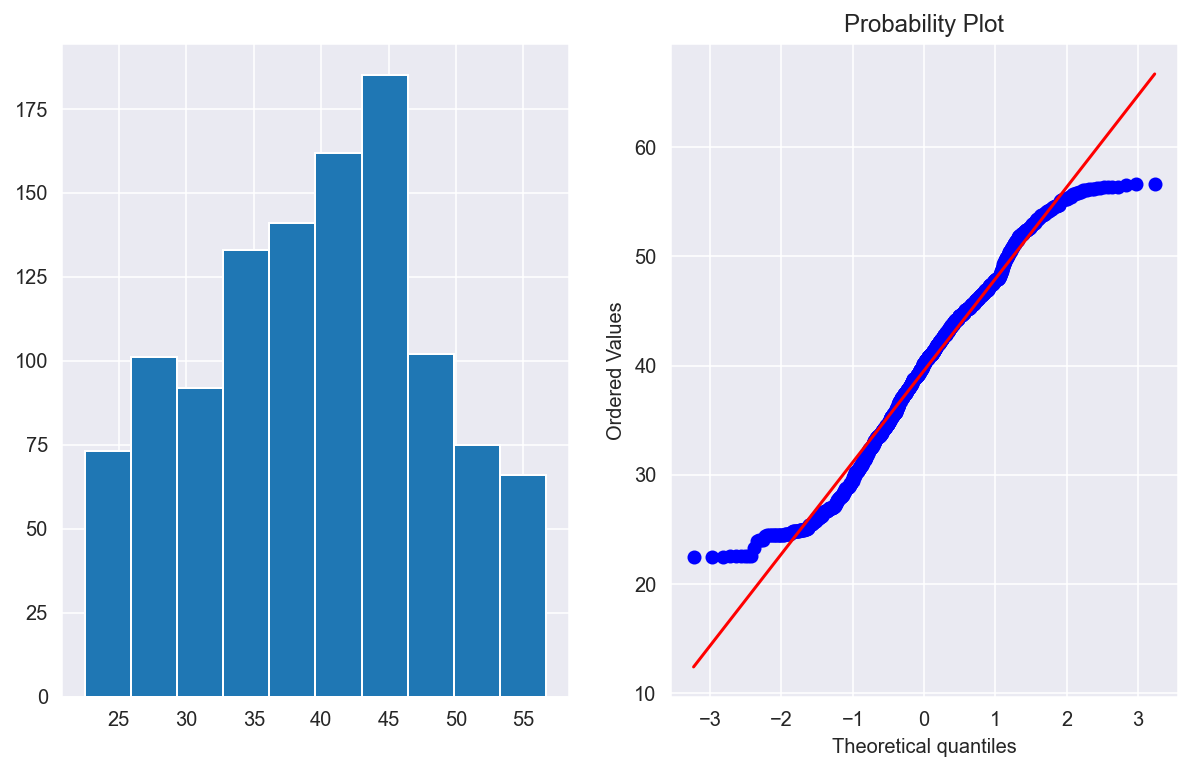

In [160]:
plot_data(df1,'charges_Boxcox')


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
### fit vs fit_transform
X_train=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [ ]:
import statsmodels.api as sm
X_constant = sm.add_constant(X_train)
model=sm.OLS(y_train,X_constant).fit()
model.summary()

In [ ]:
linearity_test(model,y_train) 


In [ ]:
homoscedasticity_test(model)

##### Lasso and RIDGE

In [299]:
from sklearn.linear_model import Lasso,Ridge
lasso_reg=Lasso(alpha=50,max_iter=100,tol=0.1)
ridge_reg=Ridge(alpha=50,max_iter=100,tol=0.1)

In [300]:
lasso_reg.fit(X_train,y_train)
lasso_reg.score(X_test,y_test)

0.7252179872688089

In [301]:
ridge_reg.fit(X_train,y_train)
ridge_reg.score(X_test,y_test)

0.6924896501913844

#### DECISION TREE regression

In [229]:
from sklearn.tree import DecisionTreeRegressor

In [230]:
rdtree=DecisionTreeRegressor(criterion='mse')

In [231]:
rdtree.fit(X_train,y_train)

DecisionTreeRegressor()

In [232]:
rdtree.score(X_test,y_test)

0.7614259398545775

### Support vector Regression (SVR)

In [233]:
from sklearn import svm
svr_reg=svm.SVR(kernel='rbf',C=1.0,epsilon=1.5,degree=1)

In [234]:
svr_reg.fit(X_train,y_train)

SVR(degree=1, epsilon=1.5)

In [235]:
svr_reg.score(X_test,y_test)

-0.11908326581701534

In [236]:
y_pred=svr_reg.predict(X_test)

In [237]:
mean_absolute_error(y_test, y_pred)

8578.779892357063

In [238]:
metrics.r2_score(y_test,y_pred)

-0.11908326581701534

In [239]:
from sklearn.metrics import mean_squared_error 
from math import sqrt

### KNN regression

In [240]:

from sklearn.neighbors import KNeighborsRegressor
rmse_val = [] #to store rmse values for different k
for K in range(20):
    K = K+1
    model =KNeighborsRegressor(n_neighbors = K)

    model.fit(X_train, y_train)  #fit the model
    pred=model.predict(X_test) #make prediction on test set
    error = sqrt(mean_squared_error(y_test,pred)) #calculate rmse
    rmse_val.append(error) #store rmse values

<AxesSubplot:>

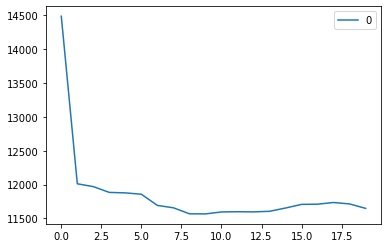

In [241]:
#plotting the rmse values against k values
curve = pd.DataFrame(rmse_val) #elbow curve 
curve.plot()

In [242]:
from sklearn.model_selection import GridSearchCV
params = {'n_neighbors':[2,3,4,5,6,7,8,9]}

knn = KNeighborsRegressor()

model = GridSearchCV(knn, params, cv=5)
model.fit(X_train,y_train)
model.best_params_


{'n_neighbors': 9}

In [243]:
    model =KNeighborsRegressor(n_neighbors = 9)

    model.fit(X_train, y_train)  #fit the model
    pred=model.predict(X_test) #make prediction on test set
    error = sqrt(mean_squared_error(y_test,pred)) #calculate rmse
  #store rmse values

In [244]:
error

11567.360000391349

In [245]:
r2score=model.score(X_test,y_test)
r2score

0.15760808733499365

### Random Forrest Regresssion

In [143]:
from sklearn.ensemble import RandomForestRegressor

In [144]:
rf_reg=RandomForestRegressor(n_estimators=100,random_state=0)
rf_reg.fit(X_train,y_train)

RandomForestRegressor(random_state=0)

In [145]:
rf_reg.score(X_test,y_test)

0.718475021197623

In [146]:
from sklearn.metrics import mean_squared_error 
from math import sqrt

In [149]:
mean_squared_error(y_test,rf_reg.predict(X_test))

0.22446268552023932

In [310]:
r2=0.86360901864

adj_r2 = 1 - ((1 - r2) * (267 - 1) / (267-8- 1))

In [311]:
adj_r2

0.8593798409234108

# Stepwise Regression
